In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def sig(X, tetha):
    z = np.dot(X, tetha)
    return 1 / (1 + np.exp(-z))

In [130]:
X = np.random.uniform(0, 10, 1000).reshape(500, 2)
X = np.append(np.ones(len(X)).reshape(len(X), 1), X, axis = 1)
tetha = np.array([0, -1, 1])
Y = np.array([np.random.choice([1 , 0], p = [sig(x, tetha), 1 - sig(x, tetha)]) for x in X])
tetha = tetha.reshape(3, 1)

### Assignment 1
Implement LogisticRegression class.

In [131]:
class LogisticRegression:
    """
    Logistic Regression Class

    """

    def __init__(self):
        """
        Init method
        """
        self.betta = None
        self.alpha = 0.01

        
    def sigmoid(self, X):
        """
        :param X: m x 1+n matrix, where m is the number of samples, n is the number of features
        :return: sigmoid (logistic) of (X,betta)
        """
        z = np.dot(X, self.betta)
        return 1 / (1 + np.exp(-z))

    def gradient(self, X, Y):
        """
        :param X: m x 1+n matrix, where m is the number of samples, n is the number of features
        :param Y: 1D-array of labels (for example: [1, 0, 0, 1, .., 0])
        :return: gradient of loss function
        """
        g = np.dot(X.T, (self.sigmoid(X) - Y))
        return g / len(X)


    def fit(self, X, Y, num_iter):
        """
        :param X: m x 1+n matrix, where m is the number of samples, n is the number of features
        :param Y: 1D-array of labels (for example: [1, 0, 0, 1, .., 0])
        :param alpha: (float) learning rate
        :param num_iter: number of iterations
        :return: optimal betta
        """
        Y_ = Y.reshape(500, 1)
        self.betta = np.zeros(len(X[0])).reshape(len(X[0]), 1)
        for i in range(num_iter):
            self.betta = self.betta - self.alpha * self.gradient(X, Y_)        
            
        return self.betta


    def predict(self, X):
        """
        :param X: m x 1+n matrix, where m is the number of samples, n is the number of features
        :return: 1D-array of predicted labels (for example: [1, 0, 0, 1, .., 0])
        """
        return np.dot(X, self.betta)

    def loss(self, X, Y):
        """
        Method for calculation current loss
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) labels
        :return: Loss
        """
        return (-np.dot(Y.T, np.log(self.sigmoid(X))) - np.dot((1 - Y).T, np.log(1 - self.sigmoid(X)))) / len(X)
        

Loss: [0.29911935]


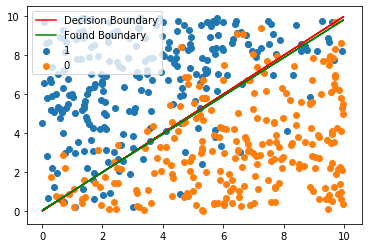

In [132]:
obj = LogisticRegression()
plt.scatter(X.T[1][Y == 1], X.T[2][Y == 1], label = "1")
plt.scatter(X.T[1][Y == 0], X.T[2][Y == 0], label = "0")
plt.plot(X.T[1], X.T[1], 'r', label = "Decision Boundary")
betta = obj.fit(X, Y, 1000)
X_ = -((betta[0] + X.T[1] * betta[1]) / betta[2])
plt.plot(X.T[1], X_, 'g', label = "Found Boundary")
print("Loss:",obj.loss(X, Y))
plt.legend(loc = 0);

HINT: Implementations of the functions are way easier in matrix form. You can find corresponding matrix forms in "Logistic Regression" notebook.

### Assignment 2
* Generate and plot classified dataset with decision boundary being the line $ -x_1 + x_2 = 0 $ (this means true betta is [0, -1, 1]). 
* Use logistic regression to classify your dataset and find optimal betta. 
* Plot the found boundary. 
* Print the loss. <br>
##### You should obtain a figure like the one below.

### DON'T EXECUTE THIS CELL !!! 

Loss:  0.32230447815190333


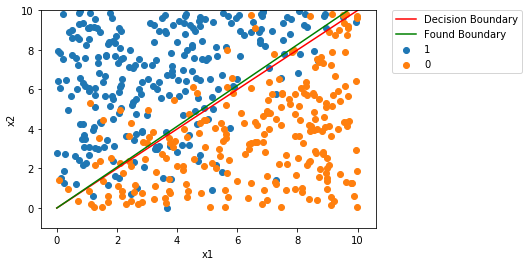